# <span style="color:white">Topic for today:</span>
![Flower diagram](https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg)

In [2]:
import numpy as np # Standard notation

In [41]:
# Why use numpy?
# Most times in labs, you'll be gathering multiple data points per sample
# To demonstrate this, I'll use a classic dataset in machine learning: 
#                                   the iris flower dataset

# Sci-kit learn should be included in Anaconda, 
#     so we'll go ahead and take the dataset from their library.
from sklearn.datasets import load_iris
dataset = load_iris()['data'] # Syntax here is specific to what sklearn.datasets returns
# So what's in the dataset?
# Here, we measure sepal length and width, and petal length and width.

# Now let's look at the dataset.
# To start out, we want to get an idea of what we're working with. 
#     First I'll print the dimensions of the dataset:
print(dataset.shape) # Numpy equivalent of len
# This tells us that our dataset has 150 entries and 4 features.
# The four features are what we already expected - 
#             the length and width measurements.
# Entries here is the same thing as the number of samples we have - 
#     the biologist who made this measured 150 flowers.
# Let's view the data in raw form:
print(dataset)
# Although the whole dataset gets printed here, note that this is not the general case.

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [4]:
# Since we're dealing with what is in essense a matrix, 
# we shouldn't use the standard techniques we learned 
#          earlier for accessing a dataset.
# By way of reminder:
onedim = [1,2,4,5,7,8]
print(onedim[3])
print(onedim[3:])
print(onedim[::-1])

5
[5, 7, 8]
[8, 7, 5, 4, 2, 1]


In [5]:
# However, the extension that numpy adds to the methods we already
#   know is pretty intuitive.
# To access anything, we use the index of [row,column].
# We can see that 3.6 doesn't have values like it near it,
#    so we'll target it to see if we're doing things right.
# Starting counting at 0, we can see that 3.6 is in 
#            row 4 and column 1.
# Just by working off the syntax, we can figure out that the 
#       index is therefore:
print(dataset[4,1])
# What if we only care about the zero-ith column of features (sepal length)?
# Well, remember we can do this for normal python lists to get back the original list:
print(onedim[:])
# With that in mind, how should we fill this in if we only want to keep the 0th column?
# dataset[row,column]

print(dataset[:,0])
# Now that the dataset is printed like this, we can already notice an interesting feature -
#    the numbers generally tend to increase as the dataset progresses.
#    This is no mistake, as I'll explain later on.

# Numpy often works in a logical way for functions defined for standard
#    python lists.
# For example:
def stdev(data):
    # Compute mean, square variance, divide by n-1, take sqrt
    mean = sum(data)/len(data)
    variance = sum([(x-mean)**2 for x in data])
    return (variance/(len(data)-1))**0.5
print(stdev(onedim))
print(stdev(dataset)) # Here numpy decides to take the "column standard deviation"
                 # This is sensible because each data point likely has its own variance.
# In general, however, you should avoid normal Python functions as much as you can
#   for Numpy stuff. This is because numpy uses a lot of optimization tricks under the
#   hood for its own numerical methods (the function call goes directly to compiled C code)
#   so it's most optimal to use the library methods.

3.6
[1, 2, 4, 5, 7, 8]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
2.7386127875258306
[0.82806613 0.43359431 1.76442042 0.76316074]


In [6]:
from time import time # They have a bunch of other functions, 
#                  so that's why the redundant naming schema

ratios = []
for samples in range(100): # We're scientists, so let's take lots of timing samples.
    start1 = time()
    stdev(dataset)
    elapsed1 = time()-start1
    
    start2 = time()
    dataset.std(axis=0)
    elapsed2 = time()-start2
    
    ratios.append(elapsed1/elapsed2)

print('The Python lists way took on average:',round(sum(ratios)/len(ratios),2),'times longer than the Numpy method.')

The Python lists way took on average: 9.12 times longer than the Numpy method.


In [7]:
# Here I'm using axis=0 because otherwise numpy will try to take the
    # standard deviation of everything.
# In general, the useful numpy functions you might use are:
print(dataset.min(axis=0))
print(dataset.max(axis=0))
print(dataset.std(axis=0))
print(dataset.mean(axis=0))
# Honestly, I haven't used any other ones than these.

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]
[0.82530129 0.43214658 1.75852918 0.76061262]
[5.84333333 3.054      3.75866667 1.19866667]


In [8]:
# Now that we know in general how to work with the underlying library,
#    let's work on visualizing what's going on with the data.
import matplotlib.pyplot as plt # Standard notation
# Since we noticed that bit about the dataset increasing, 
# we might be able to get some useful information from a histogram. 
# Histograms keep track of the frequency of where data shows up.

![Histogram example](https://upload.wikimedia.org/wikipedia/commons/1/15/Symmetric-histogram.png)

In [9]:
# Since the dataset is increasing, maybe the histogram will look like a
#    roughly uniform line from the dataset min to the dataset max?

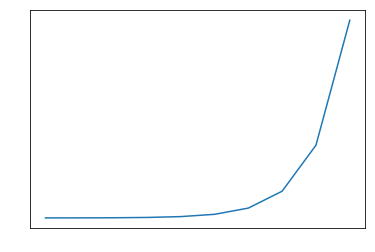

In [10]:
# Now let's dive into the specifics of matplotlib.
import math
edata = [0.0001*math.e**x for x in range(10)]
plt.plot(edata)
plt.show()
# plt.plot() creates the graph, plt.show() actually makes it display.
# There are a lot of immediately noticable problems though:
#    it's tiny (this is specific to Jupyter)
#    there are no labels on x or y, and no plot title
#    the black doesn't show up well against blue 
#         (this is specific to my custom settings)

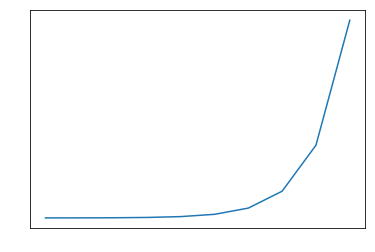

In [11]:
# Here's how we'll fix each of these.
# Since the color thing is specific to me, I'll go ahead and fix 
# that with a library I wrote. (This is for my own code only.)
from jpsettings import dark
dark.prep(dims=(6,4),silent=True)

edata = [0.0001*math.e**x for x in range(10)]
plt.plot(edata)
plt.show()

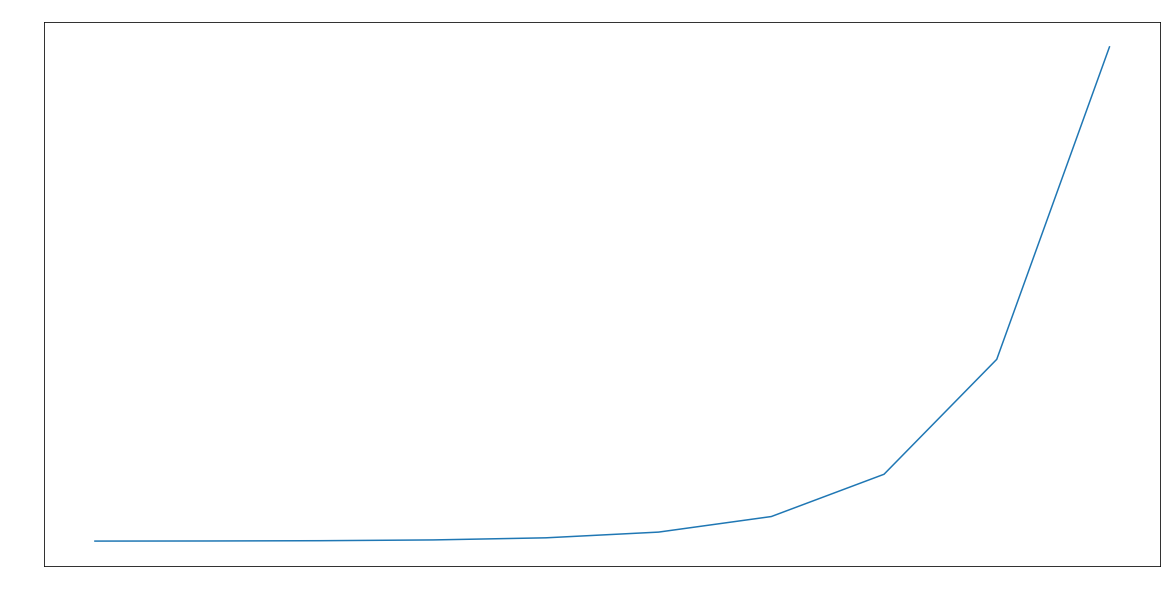

In [15]:
# We still need to fix the size and labels issue.
from jpsettings import dark
dark.prep(dims=False,silent=True)
plt.rcParams['axes.labelcolor'] = 'w'

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of e^x with spacing of 1 on x axis',color='w')
plt.rcParams['figure.figsize'] = (20,10)

edata = [0.0001*math.e**x for x in range(10)]
plt.plot(edata)
plt.show()

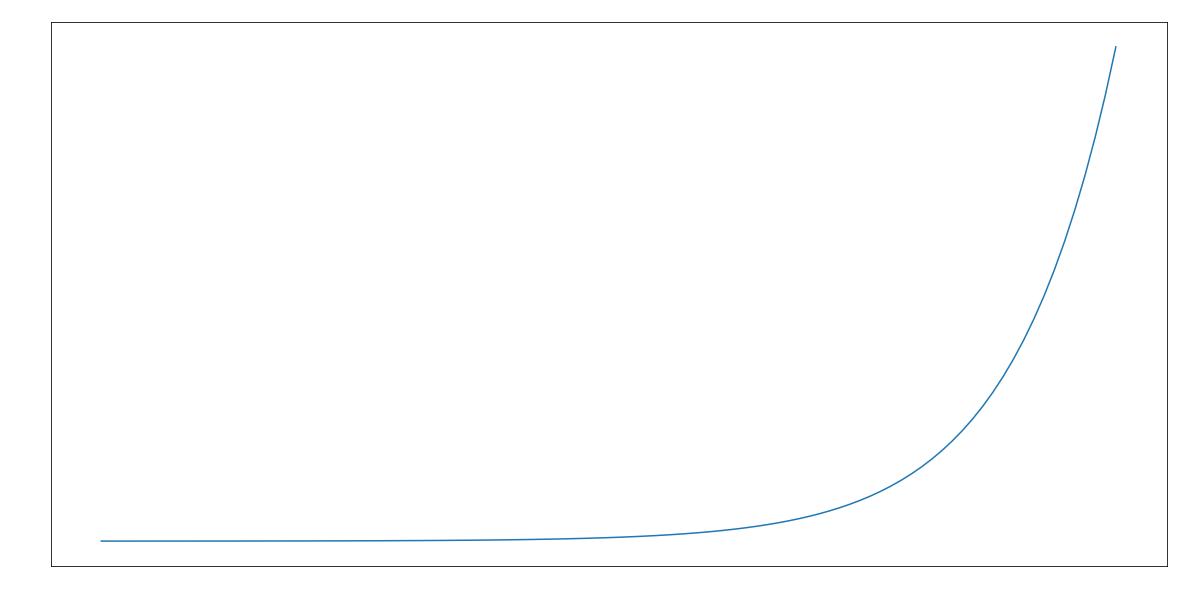

In [19]:
# Looks good, but the graph is pretty sparse. 
# We should have more detail so we can work more closely with the graph:
from jpsettings import dark
dark.prep(dims=False,silent=True)
plt.rcParams['axes.labelcolor'] = 'w'

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of e^x with spacing of 1 on x axis',color='w')
plt.rcParams['figure.figsize'] = (20,10)

###
edata = [0.0001*math.e**x for x in np.arange(0,10,0.1)]
###
plt.plot(edata)
plt.show()

In [ ]:
# Now that we have an idea of how to generally approach graphing,
#   let's figure out histograms.

![Histogram example](https://upload.wikimedia.org/wikipedia/commons/1/15/Symmetric-histogram.png)

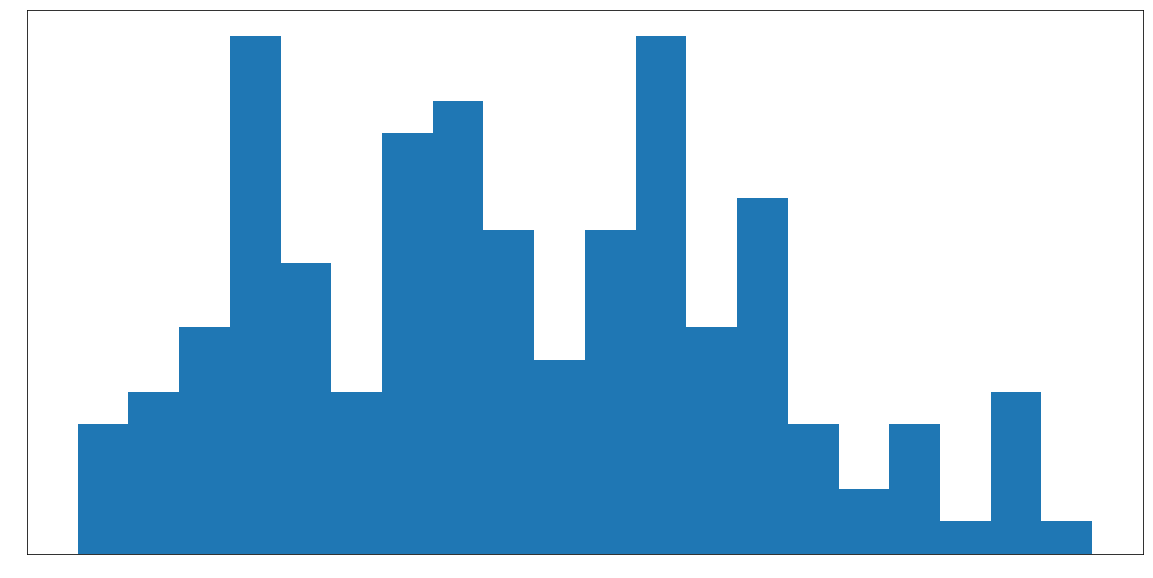

In [40]:
# Histograms roughly show a distribution.
# We can choose the size of the boxes, although a smaller box size may mean that
#     you can no longer see any information in certain areas. 
#     This is because [draw on board] data sparsity.
#     So we have to choose a box size that makes sense.

# Let's start with the zeroth column - sepal length:
dark.prep(dims=False,silent=True)
plt.rcParams['axes.labelcolor'] = 'w'

plt.rcParams['figure.figsize'] = (20,10)
plt.hist(dataset[:,0],bins=20)
plt.show()
# This looks okay, but bins are too wide. Set to 20 and 40. 
#    Looks like some distinct distributions??

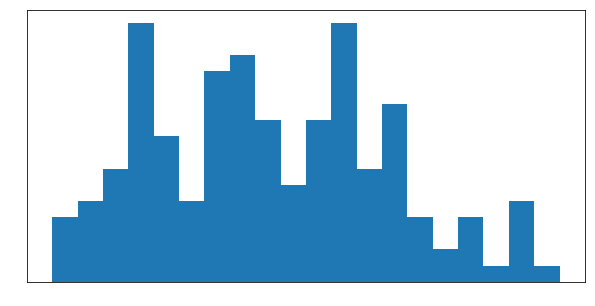

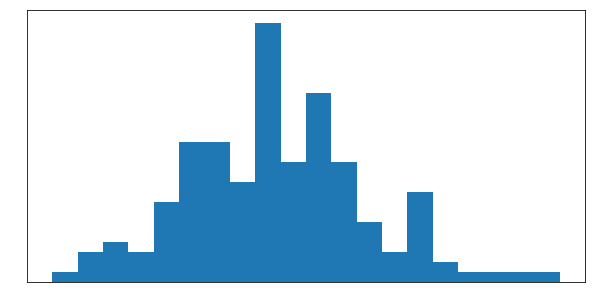

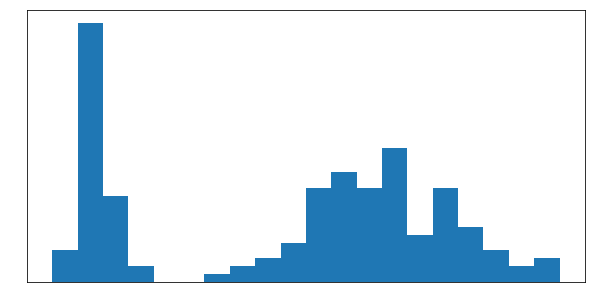

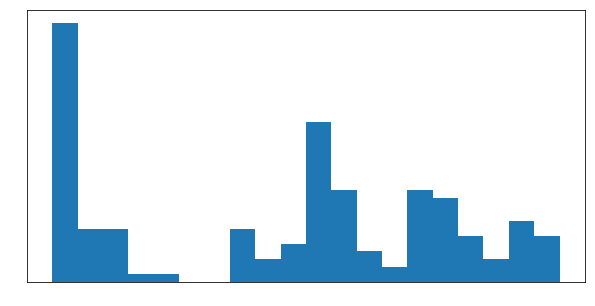

In [44]:
# To get a better idea of what's up, let's try plotting out all the distributions.

plt.rcParams['figure.figsize'] = (10,5) # Smaller so we can easily read all 4 plots
for i in range(4):
    dark.prep(dims=False,silent=True)
    plt.rcParams['axes.labelcolor'] = 'w'
    
    plt.hist(dataset[:,i],bins=20)
    plt.show()

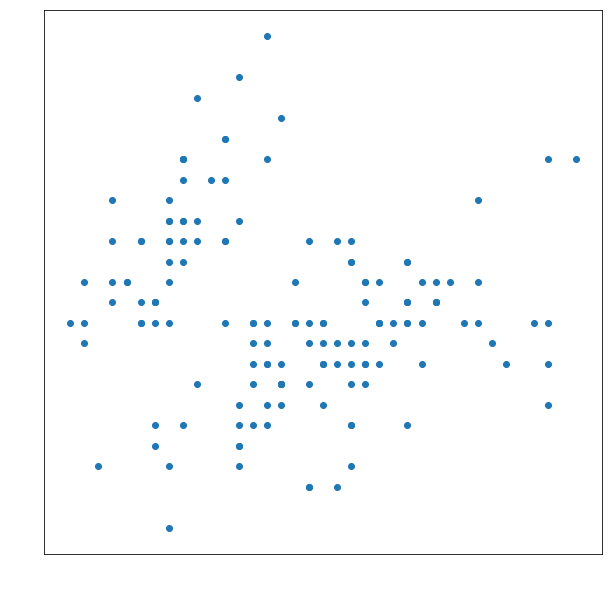

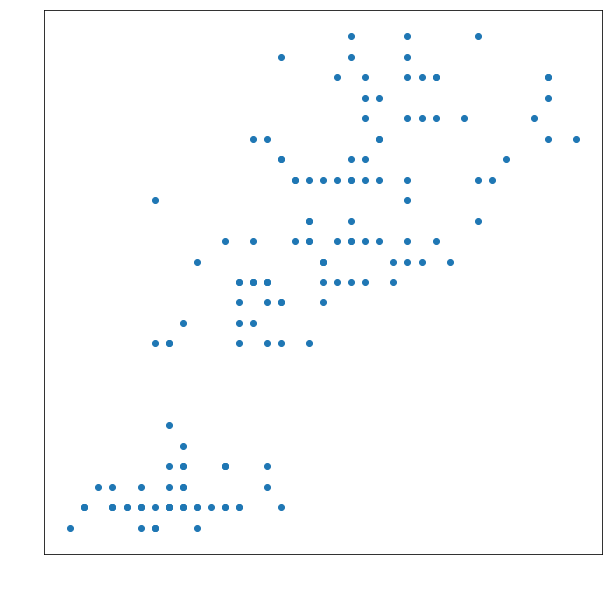

In [56]:
# Now the three peaks are much less clear. Maybe there's
# something else can do to look at the data?
# Let's try scatter plotting it.

names = ['sepal length','sepal width','petal length','petal width']

# I'm going to try plotting axes 0,1 and 0,3
for i in [[0,1],[0,3]]:
    # Setup
    dark.prep(dims=False,silent=True)
    plt.rcParams['axes.labelcolor'] = 'w'
    plt.rcParams['figure.figsize'] = (10,10)
    
    plt.scatter(dataset[:,i[0]],dataset[:,i[1]])
    plt.xlabel(names[i[0]])
    plt.ylabel(names[i[1]])
    plt.show()
# We see some clusters going on. It's much clearer in the second graph.
# Now let's use the literature to figure out what's actually going on.

# <span style="color:white">The dataset actually looks like this.</span>
![Scatter plot, separated](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/749px-Iris_dataset_scatterplot.svg.png)

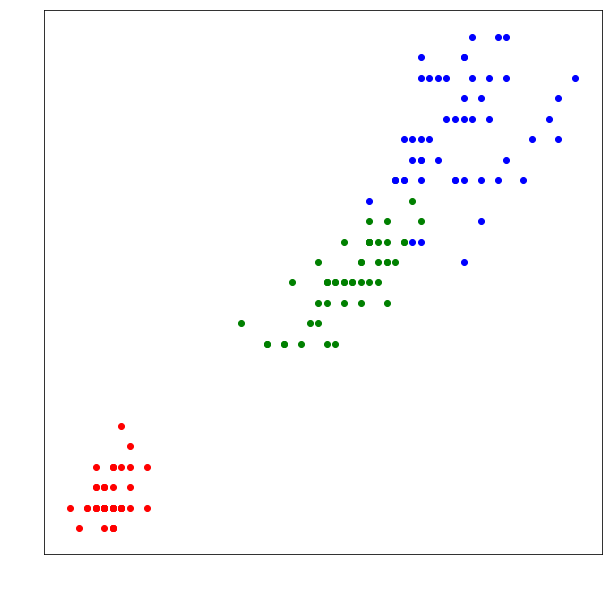

In [54]:
# Now let's try replicating one of their graphs (the 2,3 one)
# The first 50 data points are setosa
# similarly, the next are versicolor and virginica
dark.prep(dims=False,silent=True)
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(dataset[:50,2],dataset[:50,3],color='red')
plt.scatter(dataset[50:100,2],dataset[50:100,3],color='green')
plt.scatter(dataset[100:,2],dataset[100:,3],color='blue')
plt.xlabel(names[0])
plt.ylabel(names[3])
plt.show()

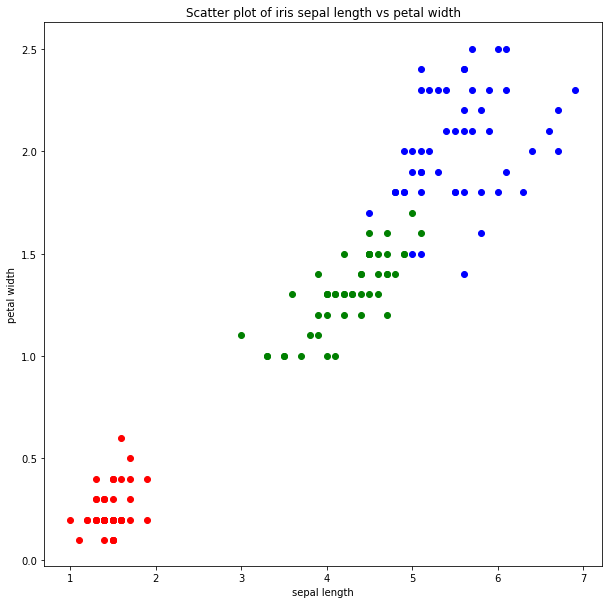

In [63]:
# This graph looks great. Let's slap a title on it and save it.
# I'm going to turn off my usual settings since graph is saved
#    on a white background.
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['axes.labelcolor'] = 'k'

plt.scatter(dataset[:50,2],dataset[:50,3],color='red')
plt.scatter(dataset[50:100,2],dataset[50:100,3],color='green')
plt.scatter(dataset[100:,2],dataset[100:,3],color='blue')
plt.xlabel(names[0])
plt.ylabel(names[3])
plt.title('Scatter plot of iris sepal length vs petal width')
plt.savefig('iris_scatter.png', bbox_inches='tight')
plt.savefig('iris_scatter.svg', bbox_inches='tight')
plt.show()

In [ ]:
### Some extra notes on how to use the object oriented
# backend if there's time (ie plt.gca)